## Visualize prediction results

Use debug

In [1]:
import sys
import matplotlib.pyplot as plt
import pretty_midi
import soundfile
import torch
import numpy as np
import glob


SAMPLE_RATE = 44100
MIN_MIDI = 21
MAX_MIDI = 108

HOP_SIZE = 512
N_MELS = 229
N_FFT = 2048
F_MIN = 30
F_MAX = 8000


In [6]:
import pytsmod as tsm

# 절대 경로로 써줄 것
x, sr = sf.read('/home/haemin/Documents/gct634-ai613-2021/onsets-and-frames/data/Pianist8/Hisaishi_First_Love.wav')
x = x.T
x_length = x.shape[-1]  # length of the audio sequence x.

s_fixed = 1.3  # stretch the audio signal 1.3x times.
s_ap = np.array([[0, x_length / 2, x_length], [0, x_length, x_length * 1.5]])  # double the first half of the audio only and preserve the other half.

x_s_fixed = tsm.wsola(x, s_fixed)
x_s_ap = tsm.wsola(x, s_ap)

In [3]:
def load(audio_path, midi_path):
    """Loads an audio track and the corresponding labels."""
    audio, sr = soundfile.read(audio_path, dtype='int16')
    print(sr)
    assert sr == SAMPLE_RATE
    frames_per_sec = sr / HOP_SIZE

    audio = torch.ShortTensor(audio)
    audio_length = len(audio)

    mel_length = audio_length // HOP_SIZE + 1

    midi = pretty_midi.PrettyMIDI(midi_path)
    midi_length_sec = midi.get_end_time()
    frame_length = min(int(midi_length_sec * frames_per_sec), mel_length)

    audio = audio[:frame_length * HOP_SIZE]
    frame = midi.get_piano_roll(fs=frames_per_sec)
    onset = np.zeros_like(frame)
    for inst in midi.instruments:
        for note in inst.notes:
            onset[note.pitch, int(note.start * frames_per_sec)] = 1

    # to shape (time, pitch (88))
    frame = torch.from_numpy(frame[MIN_MIDI:MAX_MIDI + 1].T)
    onset = torch.from_numpy(onset[MIN_MIDI:MAX_MIDI + 1].T)
    data = dict(path=audio_path, audio=audio, frame=frame, onset=onset)
    return data

In [4]:
midi_files = sorted(glob.glob("".join(['./data/sample/', '*.midi'])))
wav_files = sorted(glob.glob("".join(['./data/sample/', '*.wav'])))

for i in range(len(wav_files)):
    m_file = midi_files[i]
    w_file = wav_files[i]
    print(f'data {i}: {m_file}, {w_file}')
    

data 0: ./data/sample/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.midi, ./data/sample/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.wav
data 1: ./data/sample/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_06_Track06_wav.midi, ./data/sample/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_06_Track06_wav.wav


In [5]:
data = load(wav_files[0], midi_files[0])
print(f'data path: {data["path"]}')
print(f'audio_shape: {data["audio"].shape}')
print(f'frame_roll_shape: {data["frame"].shape}')
print(f'onset_roll_shape: {data["onset"].shape}')

44100
data path: ./data/sample/MIDI-Unprocessed_SMF_02_R1_2004_01-05_ORIG_MID--AUDIO_02_R1_2004_05_Track05_wav.wav
audio_shape: torch.Size([42799104, 2])
frame_roll_shape: torch.Size([83592, 88])
onset_roll_shape: torch.Size([83592, 88])


torch.Size([42799104, 2])
torch.Size([83592, 88])
torch.Size([83592, 88])


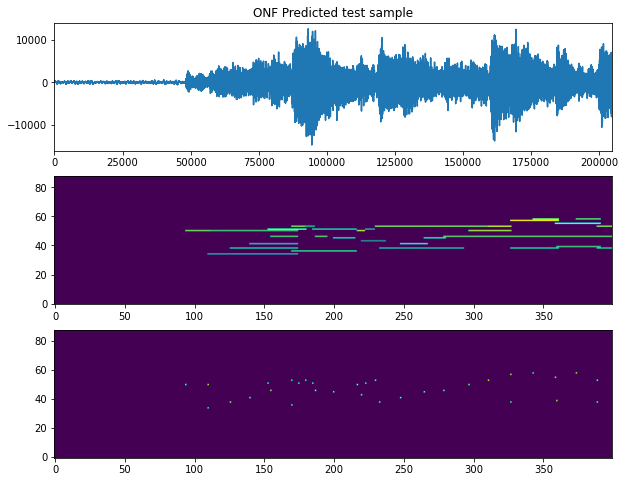

In [8]:
plt.figure(figsize=(10,8))
plt.subplot(311).set_title('ONF Predicted test sample')
plt.plot(data['audio'].numpy()[:400*HOP_SIZE,0])
plt.autoscale(enable=True, axis='x', tight=True)
plt.subplot(312)
plt.imshow(data['frame'].numpy()[:400].T, aspect='auto', origin='lower')
plt.subplot(313)
plt.imshow(data['onset'].numpy()[:400].T, aspect='auto', origin='lower')

print(data['audio'].shape)
print(data['frame'].shape)
print(data['onset'].shape)

## Use PyTSMode to scale time

In [9]:
import pytsmod as tsm

audio, sr = soundfile.read(wav_files[0], dtype='int16')
x = x.T
x_length = x.shape[-1]  # length of the audio sequence x.

s_fixed = 1.3  # stretch the audio signal 1.3x times.
s_ap = np.array([[0, x_length / 2, x_length], [0, x_length, x_length * 1.5]])  # double the first half of the audio only and preserve the other half.

x_s_fixed = tsm.wsola(x, s_fixed)
x_s_ap = tsm.wsola(x, s_ap)

ModuleNotFoundError: No module named 'pytsmod'